<a href="https://colab.research.google.com/github/vldzio/Multimodal-Risk-Profiling/blob/main/US_bankrupt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#drive link
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import norm


from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/USBDT/american_bankruptcy.csv")

In [ ]:
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [ ]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

summary(df)

data shape: (78682, 21)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
company_name,object,0,0.0,8971,NaN,NaN,C_1,C_1,C_1
status_label,object,0,0.0,2,NaN,NaN,alive,alive,alive
year,int64,0,0.0,20,1999.0,2018.0,1999,2000,2001
X1,float64,0,0.0,65895,-7.76,169662.0,511.267,485.856,436.656
X2,float64,0,0.0,65690,-366.645,374623.0,833.107,713.811,526.477
X3,float64,0,0.0,36010,0.0,28430.0,18.373,18.577,22.496
X4,float64,0,0.0,59060,-21913.0,81730.0,89.031,64.367,27.207
X5,float64,0,0.0,38898,0.0,62567.0,336.018,320.59,286.588
X6,float64,0,0.0,55550,-98696.0,104821.0,35.163,18.531,-58.939
X7,float64,0,0.0,49577,-0.006,65812.0,128.348,115.187,77.528


In [ ]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print("Alive Ratio:", alive_ratio)
print("Failed Ratio:", failed_ratio)

Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


In [ ]:
print(alive_count)
print(failed_count)

73462
5220


In [ ]:
print(alive_ratio+failed_ratio)

1.0


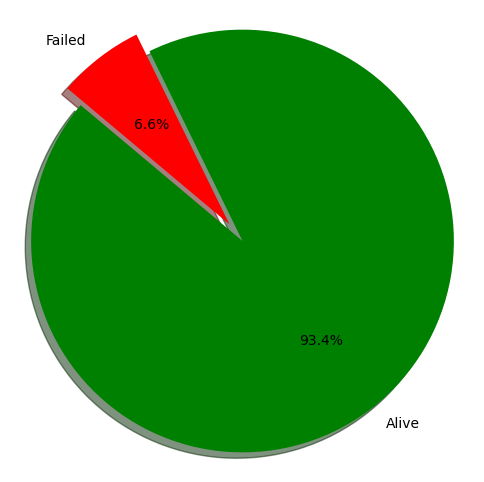

In [ ]:
import matplotlib.pyplot as plt

alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

labels = ['Alive', 'Failed']
sizes = [alive_ratio, failed_ratio]
colors = ['green', 'red']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.savefig('pie_chart.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

folder_path = "/content/drive/MyDrive/USBDT/"
input_file = folder_path + "american_bankruptcy.csv"
output_file = folder_path + "preprocessed_df.csv"

df = pd.read_csv(input_file)

df_latest = df.sort_values(by=['company_name', 'year'], ascending=[True, False]).drop_duplicates(subset=['company_name'], keep='first')

df_latest.to_csv(output_file, index=False)

print(f"Filtered dataset saved as {output_file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Filtered dataset saved as /content/drive/MyDrive/USBDT/preprocessed_df.csv


In [ ]:
preprocessed_df = pd.read_csv(output_file)
preprocessed_df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,2017,942.700,1413.200,40.500,126.500,547.900,15.600,203.000,...,1748.300,1524.700,177.200,86.000,335.100,333.300,701.200,1748.300,588.400,1621.800
1,C_10,alive,2018,924.991,2335.206,582.354,1356.041,294.094,511.047,400.988,...,3691.247,17664.202,4638.232,773.687,1356.041,1648.964,2593.475,3691.247,12315.497,2335.206
2,C_100,alive,2013,87.342,62.127,33.174,65.532,5.295,18.496,25.753,...,149.023,375.254,5.000,32.358,86.896,37.227,305.803,149.023,59.796,83.491
3,C_1000,alive,2018,3604.000,1701.000,206.000,3162.000,0.000,1958.000,1449.000,...,6258.000,9458.000,3662.000,2956.000,4557.000,2629.000,10542.000,6258.000,7154.000,3096.000
4,C_1001,alive,2018,38465.000,202446.000,802.000,3816.000,16709.000,34.000,18246.000,...,214319.000,59672.000,7265.000,3014.000,11873.000,37626.000,10558.000,214319.000,49992.000,210503.000


In [ ]:
rename_mapping = {
    "company_name": "Company_Name",
    "status_label": "Status_Label",
    "year": "Year",
    "X1": "Current_Assets",
    "X2": "Cost_of_Goods_Sold",
    "X3": "Depreciation_and_Amortization",
    "X4": "EBITDA",
    "X5": "Inventory",
    "X6": "Net_Income",
    "X7": "Total_Receivables",
    "X8": "Market_Value",
    "X9": "Net_Sales",
    "X10": "Total_Assets",
    "X11": "Total_Long_Term_Debt",
    "X12": "EBIT",
    "X13": "Gross_Profit",
    "X14": "Total_Current_Liabilities",
    "X15": "Retained_Earnings",
    "X16": "Total_Revenue",
    "X17": "Total_Liabilities",
    "X18": "Total_Operating_Expenses"
}

preprocessed_df.rename(columns=rename_mapping, inplace=True)

print("Preprocessed DataFrame has been saved to Google Drive as preprocessed_df.csv.")

Preprocessed DataFrame has been saved to Google Drive as preprocessed_df.csv.


# Calculate ratios for the Altman Z‑Score:


In [ ]:
# 1. Working Capital / Total Assets:
preprocessed_df['WC_to_TA'] = (preprocessed_df['Current_Assets'] - preprocessed_df['Total_Current_Liabilities']) / preprocessed_df['Total_Assets']

# 2. Retained Earnings / Total Assets:
preprocessed_df['RE_to_TA'] = preprocessed_df['Retained_Earnings'] / preprocessed_df['Total_Assets']

# 3. EBIT / Total Assets:
preprocessed_df['EBIT_to_TA'] = preprocessed_df['EBIT'] / preprocessed_df['Total_Assets']

# 4. Market Value of Equity / Total Liabilities:
preprocessed_df['MVE_to_TL'] = preprocessed_df['Market_Value'] / preprocessed_df['Total_Liabilities']

# 5. Net Sales / Total Assets:
preprocessed_df['Sales_to_TA'] = preprocessed_df['Net_Sales'] / preprocessed_df['Total_Assets']


# Calculate ratios for the Zmijewski Model:


In [ ]:
# 6. Return on Assets (ROA) = Net Income / Total Assets
preprocessed_df['ROA'] = preprocessed_df['Net_Income'] / preprocessed_df['Total_Assets']

# 7. Leverage = Total Liabilities / Total Assets
preprocessed_df['Leverage'] = preprocessed_df['Total_Liabilities'] / preprocessed_df['Total_Assets']

# 8. Liquidity (using the Current Ratio):
preprocessed_df['Current_Ratio_Calc'] = preprocessed_df['Current_Assets'] / preprocessed_df['Total_Current_Liabilities']


# Calculate ratios for the Ohlson O‑Score:


In [ ]:
preprocessed_df['ln_TA'] = np.log(preprocessed_df['Total_Assets'])
preprocessed_df['CL_to_CA'] = preprocessed_df['Total_Current_Liabilities'] / preprocessed_df['Current_Assets']
preprocessed_df['Neg_Net_Income'] = (preprocessed_df['Net_Income'] < 0).astype(int)

In [ ]:
preprocessed_df.to_csv('/content/drive/My Drive/USBDT/preprocessed_df.csv', index=False)

print("Updated preprocessed_df.csv with computed ratios has been saved to Google Drive.")

Updated preprocessed_df.csv with computed ratios has been saved to Google Drive.


verification

In [ ]:
print(preprocessed_df[['Company_Name', 'WC_to_TA', 'RE_to_TA', 'EBIT_to_TA',
                       'MVE_to_TL', 'Sales_to_TA', 'ROA', 'Leverage', 'Current_Ratio_Calc',
                       'ln_TA', 'Neg_Net_Income']].head())

  Company_Name  WC_to_TA  RE_to_TA  EBIT_to_TA  MVE_to_TL  Sales_to_TA  \
0          C_1  0.399685  0.459894    0.056405   2.636740     1.146652   
1         C_10 -0.040985  0.146821    0.043800   0.775534     0.208968   
2        C_100  0.133550  0.814923    0.086230   7.676112     0.397126   
3       C_1000  0.103087  1.114612    0.312540   5.900628     0.661662   
4       C_1001  0.014060  0.176934    0.050509   0.444899     3.591618   

        ROA  Leverage  Current_Ratio_Calc      ln_TA  Neg_Net_Income  
0  0.010232  0.385912            2.828383   7.329553               0  
1  0.028931  0.697201            0.560953   9.779295               0  
2  0.049289  0.159348            2.346200   5.927603               0  
3  0.207021  0.756397            1.370863   9.154616               0  
4  0.000570  0.837780            1.022298  10.996618               0  


In [ ]:
df = pd.read_csv('/content/drive/My Drive/preprocessed_df.csv')

# Calculate the Altman Z‑Score
Formula: Z = 1.2*(WC_to_TA) + 1.4*(RE_to_TA) + 3.3*(EBIT_to_TA) + 0.6*(MVE_to_TL) + 1.0*(Sales_to_TA)

In [ ]:
preprocessed_df['Altman_Z'] = (1.2 * preprocessed_df['WC_to_TA'] +
                  1.4 * preprocessed_df['RE_to_TA'] +
                  3.3 * preprocessed_df['EBIT_to_TA'] +
                  0.6 * preprocessed_df['MVE_to_TL'] +
                  1.0 * preprocessed_df['Sales_to_TA'])

 Assigning risk categories for the Altman Z‑Score (using common thresholds):
   Z > 2.99   => Safe (Low risk)
   1.81 < Z <= 2.99 => Gray Zone (Moderate risk)
   Z <= 1.81  => Distress (High risk)

In [ ]:
def altman_risk(z):
    if z > 2.99:
        return 'Safe'
    elif z > 1.81:
        return 'Gray'
    else:
        return 'Distress'

preprocessed_df['Altman_Risk'] = preprocessed_df['Altman_Z'].apply(altman_risk)

# Calculate the Zmijewski Score
Zmijewski_Score = -4.3 - 4.5 * ROA + 5.7 * Leverage - 0.004 * Current_Ratio_Calc

In [ ]:
preprocessed_df['Zmijewski_Score'] = (-4.3
                         - 4.5 * preprocessed_df['ROA']
                         + 5.7 * preprocessed_df['Leverage']
                         - 0.004 * preprocessed_df['Current_Ratio_Calc'])

Convert the Zmijewski Score into a bankruptcy probability using the standard normal CDF:
If Zmijewski_Prob > 0.5, classify as "High Risk"
Otherwise, classify as "Low Risk"

In [ ]:
preprocessed_df['Zmijewski_Prob'] = norm.cdf(preprocessed_df['Zmijewski_Score'])


preprocessed_df['Zmijewski_Risk'] = preprocessed_df['Zmijewski_Prob'].apply(lambda p: 'High Risk' if p > 0.5 else 'Low Risk')

# 3. Ohlson O‑Score
O = -1.32 - 0.407*ln_TA + 6.03*(Total_Liabilities/Total_Assets)
 - 1.43*(WC_to_TA) + 0.0757*(CL_to_CA) - 2.37*(ROA) - 1.83*(FFOI) + 0.285*(Neg_Net_Income)

In [ ]:

preprocessed_df['Ohlson_Score'] = (-1.32
                      - 0.407 * preprocessed_df['ln_TA']
                      + 6.03 * (preprocessed_df['Total_Liabilities'] / preprocessed_df['Total_Assets'])
                      - 1.43 * preprocessed_df['WC_to_TA']
                      + 0.0757 * preprocessed_df['CL_to_CA']
                      - 2.37 * (preprocessed_df['Net_Income'] / preprocessed_df['Total_Assets'])
                      + 0.285 * preprocessed_df['Neg_Net_Income'])

Convert the Ohlson score to a bankruptcy probability using the logistic function:
Classify as 'High Risk' if probability > 0.5, else 'Low Risk

In [ ]:
preprocessed_df['Ohlson_Prob'] = 1 / (1 + np.exp(-preprocessed_df['Ohlson_Score']))

preprocessed_df['Ohlson_Risk'] = preprocessed_df['Ohlson_Prob'].apply(lambda p: 'High Risk' if p > 0.5 else 'Low Risk')

Combining risk profile metrics

If Altman is in Distress or either Zmijewski or Ohlson indicate High Risk, classify as High Risk.


In [ ]:
def overall_risk(altman, zmijewski, ohlson):
    if altman == 'Distress' or zmijewski == 'High Risk' or ohlson == 'High Risk':
        return 'Risk'
    elif altman == 'Gray':
        return 'Risk'
    else:
        return 'Low Risk'

preprocessed_df['Overall_Risk'] = preprocessed_df.apply(lambda row: overall_risk(row['Altman_Risk'], row['Zmijewski_Risk'], row['Ohlson_Risk']), axis=1)

saving risk profiles

In [ ]:
preprocessed_df.to_csv('/content/drive/My Drive/USBDT/preprocessed_df.csv', index=False)
print("Risk profile values have been calculated and saved to preprocessed_df.csv.")

Risk profile values have been calculated and saved to preprocessed_df.csv.


overall risk metric to bankruptcy accuracy check

Convert overall risk into binary predictions:

We'll assume that if Overall_Risk is "High Risk", then we predict 'failed',

otherwise we predict 'alive'.

In [ ]:
preprocessed_df.head(), df.shape

(  Company_Name Status_Label  Year  Current_Assets  Cost_of_Goods_Sold  \
 0          C_1        alive  2017         942.700            1413.200   
 1         C_10        alive  2018         924.991            2335.206   
 2        C_100        alive  2013          87.342              62.127   
 3       C_1000        alive  2018        3604.000            1701.000   
 4       C_1001        alive  2018       38465.000          202446.000   
 
    Depreciation_and_Amortization    EBITDA  Inventory  Net_Income  \
 0                         40.500   126.500    547.900      15.600   
 1                        582.354  1356.041    294.094     511.047   
 2                         33.174    65.532      5.295      18.496   
 3                        206.000  3162.000      0.000    1958.000   
 4                        802.000  3816.000  16709.000      34.000   
 
    Total_Receivables  ...  Neg_Net_Income  Altman_Z  Altman_Risk  \
 0            203.000  ...               0  4.038304         Sa

In [ ]:
preprocessed_df['Status_Label'].value_counts().get('alive', 0), preprocessed_df['Status_Label'].value_counts().get('failed', 0)

(np.int64(8362), np.int64(609))

##Data Imbalance Handling
##random undersampling

In [ ]:
pip install imbalanced-learn

In [ ]:
file_path = '/content/drive/My Drive/USBDT/preprocessed_df.csv'
df = pd.read_csv(file_path)

alive_df = df[df['Status_Label'] == 'alive']
failed_df = df[df['Status_Label'] == 'failed']

alive_sampled = alive_df.sample(n=len(failed_df), random_state=42)  # Downsample "alive" to match "failed"
undersampled_df = pd.concat([alive_sampled, failed_df])

undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

undersampled_file_path = '/content/drive/My Drive/USBDT/undersampled_df.csv'
undersampled_df.to_csv(undersampled_file_path, index=False)

print(undersampled_df['Status_Label'].value_counts())

Status_Label
alive     609
failed    609
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = "/content/drive/My Drive/USBDT/undersampled_df.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=['Company_Name', 'Year', 'Altman_Risk', 'Zmijewski_Risk', 'Ohlson_Risk', 'Overall_Risk'])

X = df.drop(columns=['Status_Label'])  # Features
y = df['Status_Label']                 # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

X_normalized['Status_Label'] = y.reset_index(drop=True)

X_normalized.to_csv("/content/drive/My Drive/USBDT/undersampled_normalized_df.csv", index=False)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized.drop(columns=['Status_Label']),
    X_normalized['Status_Label'],
    test_size=0.2,
    random_state=42,
    stratify=X_normalized['Status_Label']
)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")
print("✅ Normalized undersampled dataset saved.")


Training Set: (974, 34), Test Set: (244, 34)
✅ Normalized undersampled dataset saved.


### Logistic Regression on Undersampled dataset

Accuracy: 0.7459
Precision: 0.7206
Recall: 0.8033
F1 Score: 0.7597
AUC-ROC: 0.8025


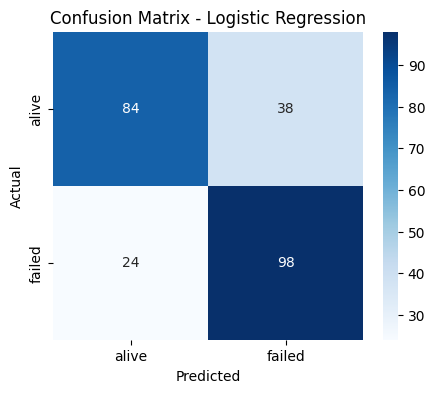

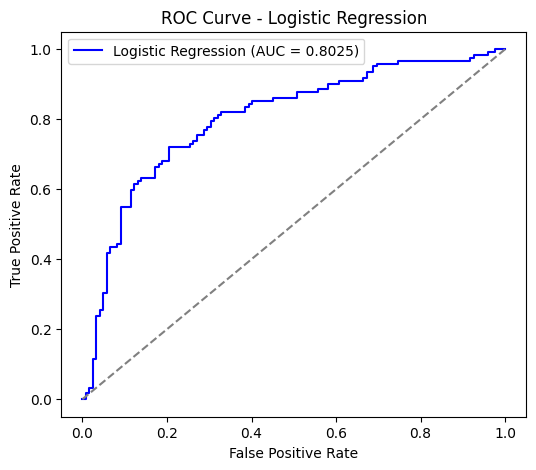

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

lr = LogisticRegression(max_iter = 100)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="failed")
recall = recall_score(y_test, y_pred, pos_label="failed")
f1 = f1_score(y_test, y_pred, pos_label="failed")
roc_auc = roc_auc_score(y_test.map({'alive': 0, 'failed': 1}), y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

fpr, tpr, _ = roc_curve(y_test.map({'alive': 0, 'failed': 1}), y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


### Random forest on undersampled dataset

Accuracy: 0.7623
Precision: 0.7500
Recall: 0.7869
F1 Score: 0.7680
AUC-ROC: 0.8490


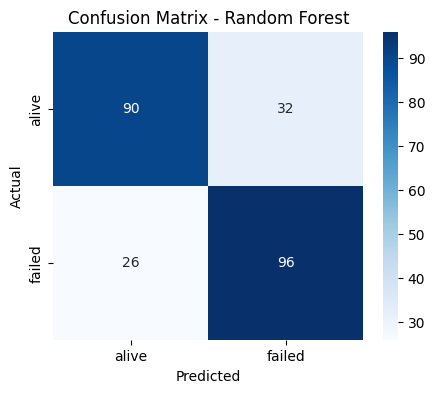

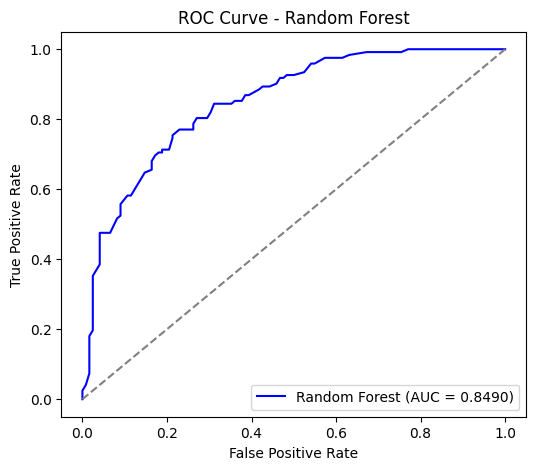

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="failed")
recall = recall_score(y_test, y_pred, pos_label="failed")
f1 = f1_score(y_test, y_pred, pos_label="failed")
roc_auc = roc_auc_score(y_test.map({'alive': 0, 'failed': 1}), y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

fpr, tpr, _ = roc_curve(y_test.map({'alive': 0, 'failed': 1}), y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

###XGBoost on Undersample

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7787
Precision: 0.7576
Recall: 0.8197
F1 Score: 0.7874
AUC-ROC: 0.8818


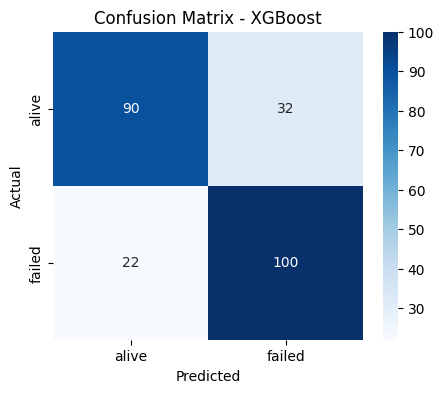

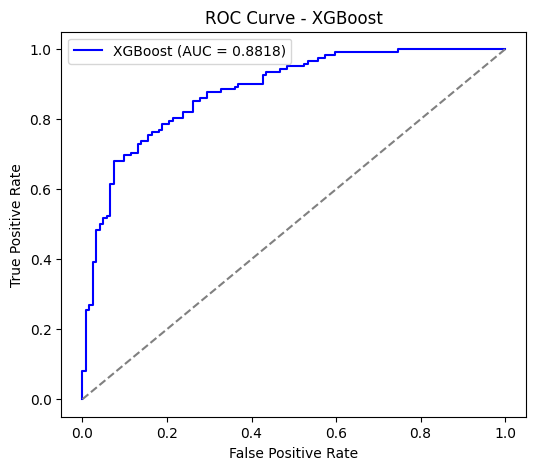

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

y_train_numeric = y_train.map({'alive': 0, 'failed': 1})
y_test_numeric = y_test.map({'alive': 0, 'failed': 1})

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train_numeric)

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test_numeric, y_pred)
precision = precision_score(y_test_numeric, y_pred)
recall = recall_score(y_test_numeric, y_pred)
f1 = f1_score(y_test_numeric, y_pred)
roc_auc = roc_auc_score(y_test_numeric, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_numeric, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

###SVM with undersampling

Accuracy: 0.7295
Precision: 0.6972
Recall: 0.8115
F1 Score: 0.7500
AUC-ROC: 0.8056


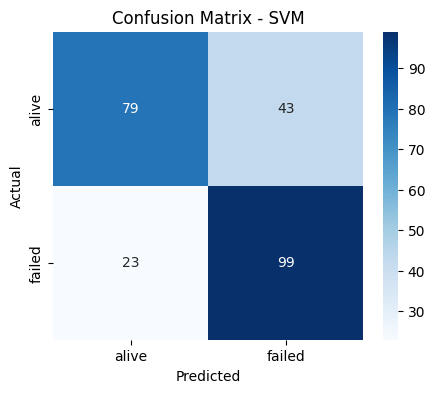

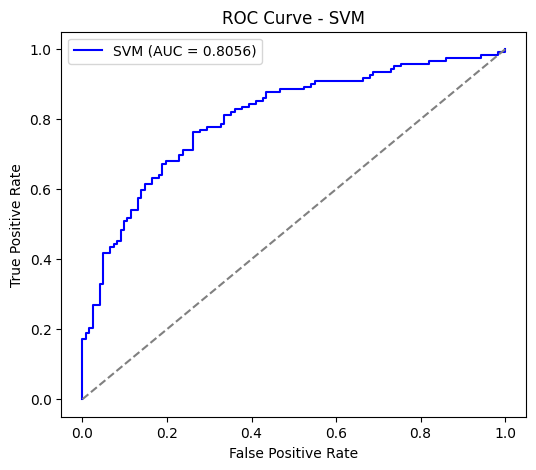

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

y_train_numeric = y_train.map({'alive': 0, 'failed': 1})
y_test_numeric = y_test.map({'alive': 0, 'failed': 1})

svm = SVC(probability=True)
svm.fit(X_train, y_train_numeric)

y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test_numeric, y_pred)
precision = precision_score(y_test_numeric, y_pred)
recall = recall_score(y_test_numeric, y_pred)
f1 = f1_score(y_test_numeric, y_pred)
roc_auc = roc_auc_score(y_test_numeric, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_numeric, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'SVM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

###KNN with undersampling

Accuracy: 0.7418
Precision: 0.7287
Recall: 0.7705
F1 Score: 0.7490
AUC-ROC: 0.7692


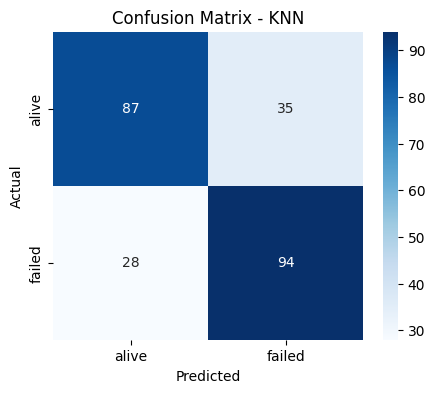

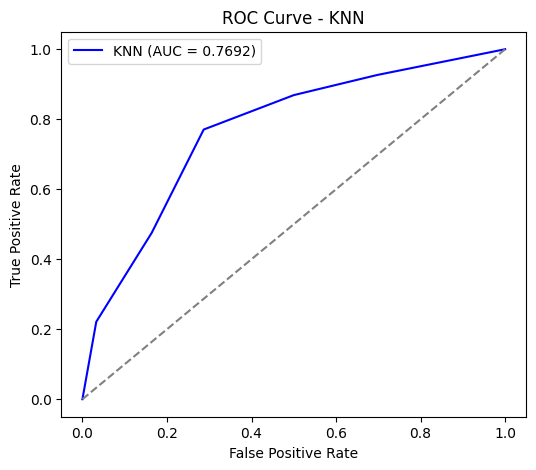

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="failed")
recall = recall_score(y_test, y_pred, pos_label="failed")
f1 = f1_score(y_test, y_pred, pos_label="failed")
roc_auc = roc_auc_score(y_test.map({'alive': 0, 'failed': 1}), y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

fpr, tpr, _ = roc_curve(y_test.map({'alive': 0, 'failed': 1}), y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

###Using smote on the same dataset

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = "/content/drive/My Drive/USBDT/preprocessed_df.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=['Company_Name', 'Year', 'Altman_Risk', 'Zmijewski_Risk', 'Ohlson_Risk', 'Overall_Risk'])

X = df.drop(columns=['Status_Label'])
y = df['Status_Label']

y_numeric = y.map({'alive': 0, 'failed': 1})

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_numeric)

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

X_resampled_normalized = pd.DataFrame(X_resampled_scaled, columns=X.columns)

y_resampled = pd.Series(y_resampled).map({0: 'alive', 1: 'failed'})

oversampled_normalized_df = pd.concat([X_resampled_normalized, y_resampled.rename("Status_Label")], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_normalized,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)


oversampled_path = "/content/drive/My Drive/USBDT/oversampled_normalized_df.csv"
oversampled_normalized_df.to_csv(oversampled_path, index=False)

print(f"✅ Normalized oversampled dataset saved at: {oversampled_path}")


✅ Normalized oversampled dataset saved at: /content/drive/My Drive/USBDT/oversampled_normalized_df.csv


Logistic regression on SMOTE

Accuracy: 0.7432
Precision: 0.7123
Recall: 0.8158
F1 Score: 0.7605
AUC-ROC: 0.8157


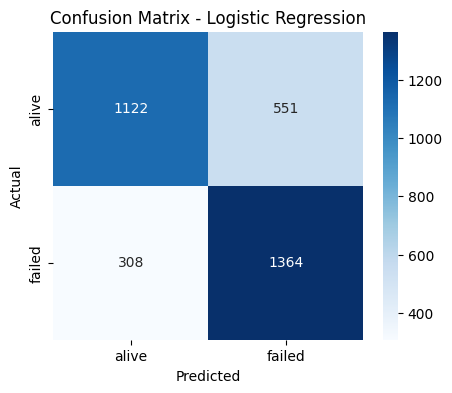

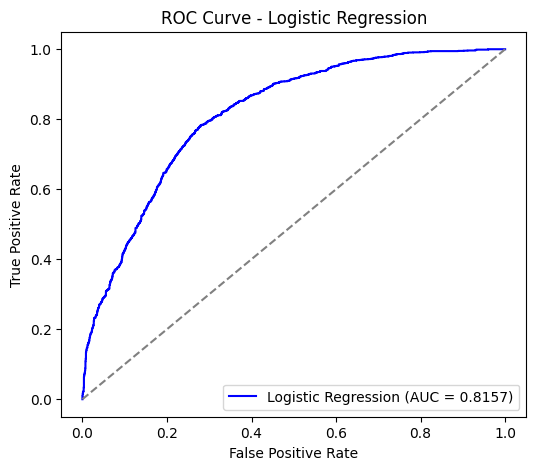

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="failed")
recall = recall_score(y_test, y_pred, pos_label="failed")
f1 = f1_score(y_test, y_pred, pos_label="failed")
roc_auc = roc_auc_score(y_test.map({'alive': 0, 'failed': 1}), y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

fpr, tpr, _ = roc_curve(y_test.map({'alive': 0, 'failed': 1}), y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

Random Forest on SMOTE

Accuracy: 0.9396
Precision: 0.9190
Recall: 0.9641
F1 Score: 0.9410
AUC-ROC: 0.9872


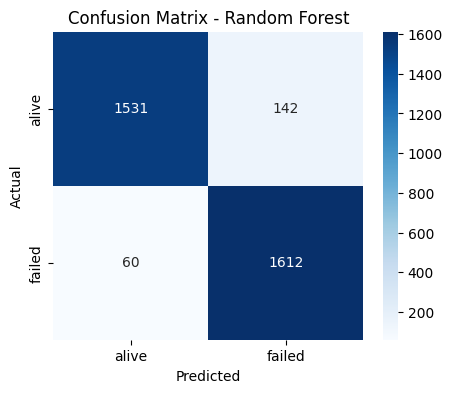

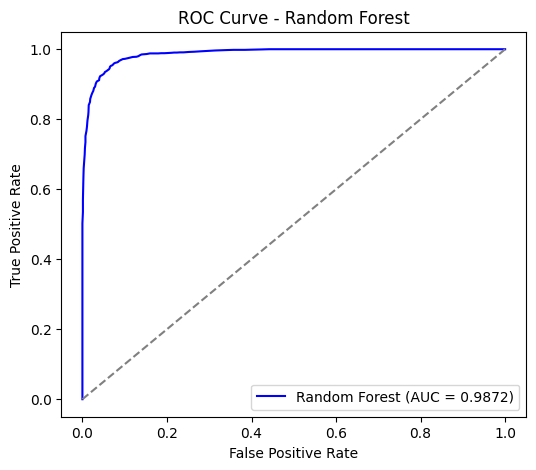

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="failed")
recall = recall_score(y_test, y_pred, pos_label="failed")
f1 = f1_score(y_test, y_pred, pos_label="failed")
roc_auc = roc_auc_score(y_test.map({'alive': 0, 'failed': 1}), y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

fpr, tpr, _ = roc_curve(y_test.map({'alive': 0, 'failed': 1}), y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

XGBoost on SMOTE

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9474
Precision: 0.9304
Recall: 0.9671
F1 Score: 0.9484
AUC-ROC: 0.9906


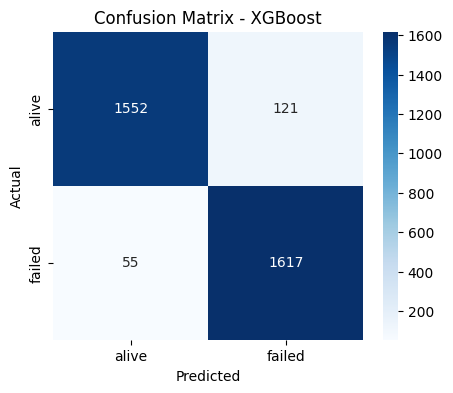

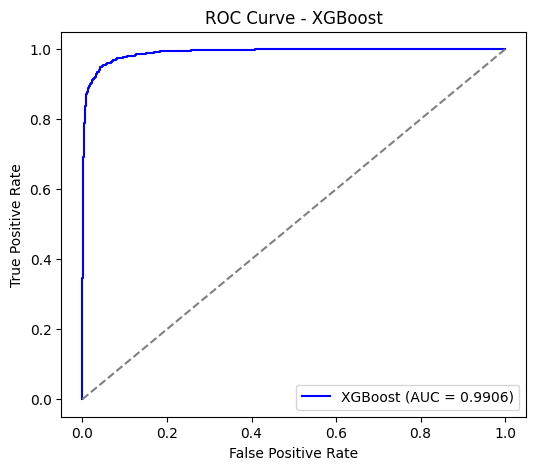

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train.map({'alive': 0, 'failed': 1}))

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test.map({'alive': 0, 'failed': 1}), y_pred)
precision = precision_score(y_test.map({'alive': 0, 'failed': 1}), y_pred)
recall = recall_score(y_test.map({'alive': 0, 'failed': 1}), y_pred)
f1 = f1_score(y_test.map({'alive': 0, 'failed': 1}), y_pred)
roc_auc = roc_auc_score(y_test.map({'alive': 0, 'failed': 1}), y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test.map({'alive': 0, 'failed': 1}), y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

fpr, tpr, _ = roc_curve(y_test.map({'alive': 0, 'failed': 1}), y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

SVM on SMOTE

Accuracy: 0.7420
Precision: 0.6957
Recall: 0.8600
F1 Score: 0.7692
AUC-ROC: 0.8229


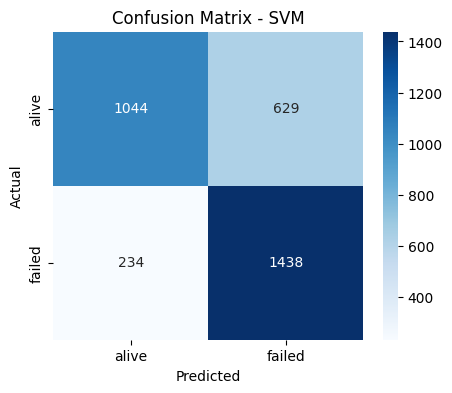

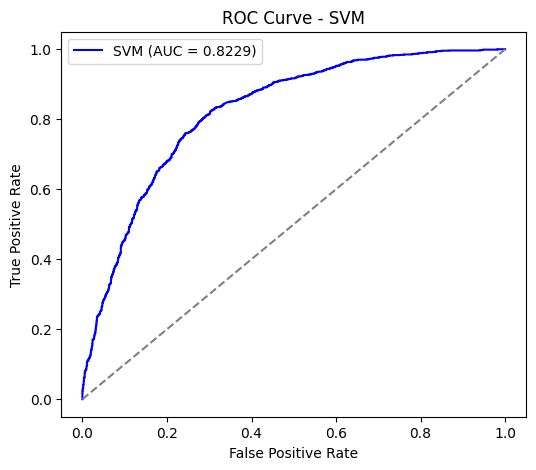

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="failed")
recall = recall_score(y_test, y_pred, pos_label="failed")
f1 = f1_score(y_test, y_pred, pos_label="failed")
roc_auc = roc_auc_score(y_test.map({'alive': 0, 'failed': 1}), y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

fpr, tpr, _ = roc_curve(y_test.map({'alive': 0, 'failed': 1}), y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'SVM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

KNN on SMOTE

Accuracy: 0.8407
Precision: 0.7863
Recall: 0.9354
F1 Score: 0.8544
AUC-ROC: 0.9147


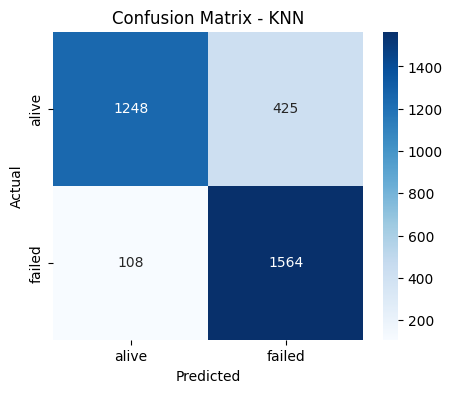

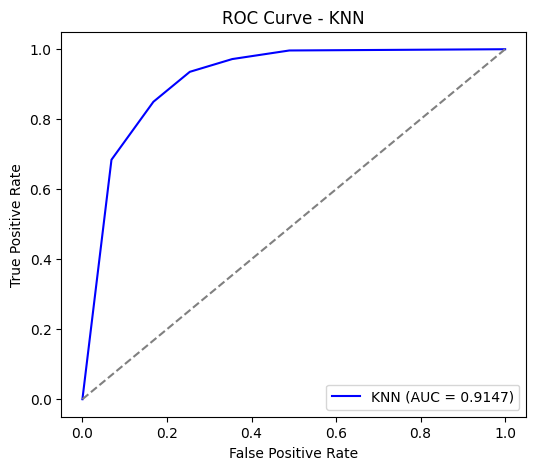

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="failed")
recall = recall_score(y_test, y_pred, pos_label="failed")
f1 = f1_score(y_test, y_pred, pos_label="failed")
roc_auc = roc_auc_score(y_test.map({'alive': 0, 'failed': 1}), y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['alive', 'failed'], yticklabels=['alive', 'failed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

fpr, tpr, _ = roc_curve(y_test.map({'alive': 0, 'failed': 1}), y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

# Sentiment analysis

In [ ]:
!pip install transformers torch

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MODEL_NAME = "yiyanghkust/finbert-tone"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME).to(device)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()

    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[predicted_class]


In [ ]:
def batch_predict(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        predicted_classes = torch.argmax(outputs.logits, dim=1).tolist()

    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return [sentiment_map[label] for label in predicted_classes]


In [ ]:
sample_text = "The company's earnings report exceeded expectations, driving stock prices up."
print("Sentiment:", predict_sentiment(sample_text))

financial_texts = [
    "The market is expected to see a major downturn following weak economic data.",
    "Company profits surged 15% last quarter.",
    "Investors remain cautious as geopolitical risks increase."
]
print("Batch Sentiments:", batch_predict(financial_texts))


model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Sentiment: Neutral
Batch Sentiments: ['Positive', 'Neutral', 'Positive']


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/Phrasebank/phrasebank_data.csv'
df = pd.read_csv(data_path)

df.head()


Mounted at /content/drive


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
from sklearn.model_selection import train_test_split

label_map = {'positive': 2, 'neutral': 1, 'negative': 0}
df['Sentiment'] = df['Sentiment'].map(label_map)

import re
def clean_text(text):
    text = re.sub(r'\$\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.strip()

df['Sentence'] = df['Sentence'].apply(clean_text)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Sentence'].tolist(),
    df['Sentiment'].tolist(),
    test_size=0.2,
    random_state=42
)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})


In [ ]:
training_args = TrainingArguments(
    output_dir="./finbert_finetuned",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
from transformers import EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir="./finbert_finetuned",
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
)

trainer.train()


In [ ]:
pip install evaluate


In [ ]:
import numpy as np
import evaluate
from transformers import EarlyStoppingCallback

f1_metric = evaluate.load("f1")

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    f1_score = f1_metric.compute(predictions=preds, references=labels, average='weighted')
    return {"f1_score": f1_score['f1']}

training_args = TrainingArguments(
    output_dir="./finbert_finetuned",
    evaluation_strategy="epoch",
    learning_rate=8e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
)

trainer.train()